# Import packages & set plot style

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import re

%matplotlib inline

In [2]:
plt.style.use('ggplot')

# Get the data ready

#### Load the dataset

In [3]:
collision = pd.read_csv('collision_2009_2018.csv', parse_dates=(['COLLISION_DATE']))
collision.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE
0,3918943,2009,20091202,1942,2009-03-23,1745,35046,1283,1,5,...,0,0,0,0,0,0,-,-,NaN,NaN
1,3984219,2009,20090115,1942,2009-01-03,540,33829,1701,6,5,...,0,0,0,0,0,0,-,-,NaN,NaN
2,3984274,2009,20090126,1942,2009-01-07,630,38614,152,3,5,...,1,0,0,0,0,0,-,-,NaN,NaN
3,3984281,2009,20090126,1942,2009-01-08,50,32896,1985,4,5,...,0,0,0,0,0,0,-,-,NaN,NaN
4,3984352,2009,20100914,1942,2009-01-11,1450,24517,2014,7,5,...,0,0,0,0,1,0,-,-,NaN,NaN


#### Make all headers lower case and exam column headers

In [4]:
collision.columns = map(str.lower, collision.columns)
collision.columns

Index(['case_id', 'accident_year', 'proc_date', 'juris', 'collision_date',
       'collision_time', 'officer_id', 'reporting_district', 'day_of_week',
       'chp_shift', 'population', 'cnty_city_loc', 'special_cond', 'beat_type',
       'chp_beat_type', 'city_division_lapd', 'chp_beat_class', 'beat_number',
       'primary_rd', 'secondary_rd', 'distance', 'direction', 'intersection',
       'weather_1', 'weather_2', 'state_hwy_ind', 'caltrans_county',
       'caltrans_district', 'state_route', 'route_suffix', 'postmile_prefix',
       'postmile', 'location_type', 'ramp_intersection', 'side_of_hwy',
       'tow_away', 'collision_severity', 'number_killed', 'number_injured',
       'party_count', 'primary_coll_factor', 'pcf_code_of_viol',
       'pcf_viol_category', 'pcf_violation', 'pcf_viol_subsection',
       'hit_and_run', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'chp_road_type', 'pedestrian_

#### Drop unnecessary columns and set index column

In [5]:
to_drop = ['officer_id', 'reporting_district', 'chp_shift', 'cnty_city_loc', 'beat_type', 'chp_beat_type', 'city_division_lapd',
         'chp_beat_class', 'beat_number', 'caltrans_county', 'caltrans_district']

collision.drop(to_drop, axis=1, inplace=True)
collision.set_index('accident_year', inplace=True)
collision.head()

,case_id,proc_date,juris,collision_date,collision_time,day_of_week,population,special_cond,primary_rd,secondary_rd,...,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude
accident_year,,,,,,,,,,,,,,,,,,,,,
2009,3918943,20091202,1942,2009-03-23,1745,1,7,0,WESTERN AV,CENTURY BL,...,0,0,0,0,0,0,-,-,NaN,NaN
2009,3984219,20090115,1942,2009-01-03,540,6,7,0,TAMPA AV,PINE VALLEY AV,...,0,0,0,0,0,0,-,-,NaN,NaN
2009,3984274,20090126,1942,2009-01-07,630,3,7,0,5TH ST,FLOWER ST,...,1,0,0,0,0,0,-,-,NaN,NaN
2009,3984281,20090126,1942,2009-01-08,50,4,7,0,VAN NUYS BL,VESPER AV,...,0,0,0,0,0,0,-,-,NaN,NaN
2009,3984352,20100914,1942,2009-01-11,1450,7,7,0,HARVARD BL,3RD ST,...,0,0,0,0,1,0,-,-,NaN,NaN


#### Data labeling

In [10]:
# day of week
dowdict = {1: 'Monday',
           2: 'Tuesday',
           3: 'Wednesday',
           4: 'Thursday',
           5: 'Friday',
           6: 'Saturday',
           7: 'Sunday'
           }

collision['day_of_week'].replace(to_replace=[i for i in dowdict.keys()], 
                                 value=[i for i in dowdict.values()],
                                 inplace=True)


# type of collision
tocdict = {'A': 'Head-On',
           'B': 'Sideswipe',
           'C': 'Rear End',
           'D': 'Broadside',
           'E': 'Hit Object',
           'F': 'Overturned',
           'G': 'Vehicle/Pedestrian',
           'H': 'Other',
           '-': 'Not Stated'
          }

collision['type_of_collision'].replace(to_replace=[i for i in tocdict.keys()],
                                       value=[i for i in tocdict.values()],
                                       inplace=True)


# violation category 
vcdict = {'0': 'Unknown',
          '1': 'Driving or Bicycling Under the Influence of Alcohol or Drug',
          '2': 'Impeding Traffic',
          '3': 'Unsafe Speed',
          '4': 'Following Too Closely',
          '5': 'Wrong Side of Road',
          '6': 'Improper Passing',
          '7': 'Unsafe Lane Change',
          '8': 'Improper Turning',
          '9': 'Automobile Right of Way',
          '10': 'Pedestrian Right of Way',
          '11': 'Pedestrian Violation',
          '12': 'Traffic Signals and Signs',
          '13': 'Hazardous Parking',
          '14': 'Lights',
          '15': 'Brakes',
          '16': 'Other Equipment',
          '17': 'Other Hazardous Violation',
          '18': 'Other Than Driver (or Pedestrian)',
          '19': None,
          '20': None,
          '21': 'Unsafe Starting or Backing',
          '22': 'Other Improper Driving',
          '23': 'Pedestrian or "Other" Under the Influence of Alcohol or Drug',
          '24': 'Fell Asleep',
          '- ': 'Not Stated'
          }

collision['pcf_viol_category'].replace(to_replace=[i for i in vcdict.keys()],
                                       value=[i for i in vcdict.values()],
                                       inplace=True)


# collission severity 
csdict = {0: 'Property Damage Only',
          1: 'Injury level 4: Fatal',
          2: 'Injury level 3: Severe',
          3: 'Injury level 2: Other Visible',
          4: 'Injury level 1: Complaint of Pain'
          }

collision['collision_severity'].replace(to_replace=[i for i in csdict.keys()],
                                        value=[i for i in csdict.values()],
                                        inplace=True)


# location type labeling
ltdict = {'H': 'Highway',
          'I': 'Intersection',
          'R': 'Ramp'
          }

collision['location_type'].replace(to_replace=[i for i in ltdict.keys()],
                                   value=[i for i in ltdict.values()],
                                   inplace=True)


# weather labeling
weatherdict = {'A': 'Clear',
               'B': 'Cloudy',
               'C': 'Raining',
               'D': 'Snowing',
               'E': 'Fog',
               'F': 'Other',
               'G': 'Wind',
               '- ': 'Not stated'
              }

collision['weather_1'].replace(to_replace=[i for i in weatherdict.keys()], 
                               value=[i for i in weatherdict.values()], 
                               inplace=True)

# Exploratory Analysis

#### High-level idea

In [13]:
print("The dataset has {:,} rows/incidents and {:,} attributes/columns."
      .format(collision.shape[0], collision.shape[1]))
print("Among the {:,} incidents, {:,} were fatal."
      .format(collision.shape[0], len(collision[collision['collision_severity'] == 'Injury level 4: Fatal'])))

The dataset has 355,488 rows/incidents and 64 attributes/columns.
Among the 355,488 incidents, 1,885 were fatal.


#### Collision trend

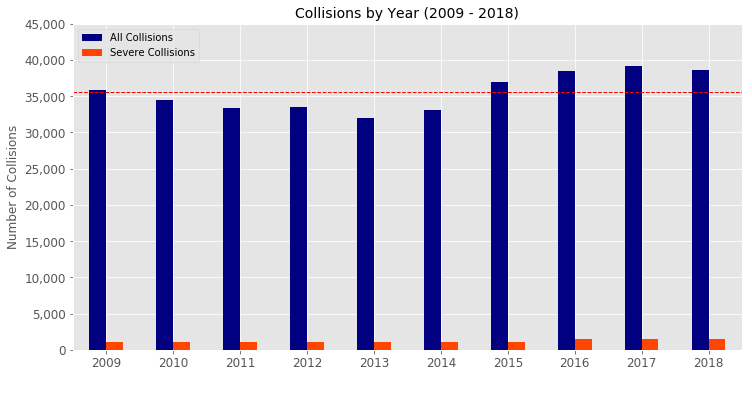

In [18]:
# Total collisions & severe collisions by year side by side

col_injury_fatal_year = collision.groupby('accident_year')['collision_severity'].agg([('All Collisions', len),
                                                                                      ('Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).sum()),
                                                                                      ('Percent of Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).mean())
                                                                                     ])

ax = col_injury_fatal_year[['All Collisions', 'Severe Collisions']].plot(kind='bar', rot=0, figsize=(12, 6), color=['navy', 'orangered'])
ax.set_title('Collisions by Year (2009 - 2018)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.set_ylim([0, 45000])
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(col_injury_fatal_year['All Collisions'].mean(), color='red', linestyle='dashed', linewidth=1)

pass